In [1]:
# Necessary imports 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import pymc3 as pm

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
# Load in the dataset
gtd = pd.read_csv('/Users/adibronshtein/Documents/Datasets/globalterrorismdb_0616dist.csv', low_memory=False)

In [3]:
# Let's take a look
gtd.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,0,0,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
gtd.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
156767,201512310032,2015,12,31,NaN,0,NaN,34,Burundi,11,...,Casualty numbers for this incident conflict ac...,"""1 dead, dozens injured in Burundi grenade att...","""One dead, dozen hurt in Burundi grenade attac...",NaN,START Primary Collection,-9,-9,0,-9,NaN
156768,201512310033,2015,12,31,2015-12-31 00:00:00,0,NaN,96,Ireland,8,...,NaN,"""Garda� investigate Knocknaheeny pipe bomb,"" C...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
156769,201512310034,2015,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Village official killed, 2 injured in Marawi,...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
156770,201512310036,2015,12,31,2015-12-31 00:00:00,0,NaN,182,Somalia,11,...,NaN,"""Africa Command OSINT Daily 31 December 2015,""...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
156771,201512310037,2015,12,31,NaN,1,1/16/16,113,Libya,10,...,Casualty numbers for this attack conflict acro...,"""20 Egyptian captives return from Libya, one r...","""21 abducted nationals released in Libya,"" Cai...","""Libya Daily Digest January 20, 2016,"" Libya D...",START Primary Collection,0,1,1,1,NaN


# Part One - EDA 

In [5]:
print "dataframe shape \n", gtd.shape # gives us the number of rows and columns


dataframe shape 
(156772, 137)


In [6]:
# Boy, that's a lot of columns! Let's see if I can see all of them
for column in gtd.columns:
    print(column)
# I guess not all of them would be useful...

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
ingroup
ingroup2
ingroup3
gsubname3
motive
guncertain1
guncertain2
guncertain3
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt


In [7]:
print "missing values \n", gtd.isnull().sum() #count how many null values are in each series
# A lot of missing values; for now I wouldn't do anything about it, but I will keep it in mind

missing values 
eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            152016
extended                   0
resolution            153270
country                    0
country_txt                0
region                     0
region_txt                 0
provstate              14520
city                     446
latitude                4519
longitude               4519
specificity                0
vicinity                   0
location              114561
summary                66140
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           132536
alternative_txt            0
multiple                   0
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
                       ...  
propextent            100420
propextent_txt             0
propvalue             12546

In [8]:
# No duplicates
gtd.duplicated().sum()

0

In [9]:
print "dataframe types \n", gtd.dtypes # check data types of each column

dataframe types 
eventid                 int64
iyear                   int64
imonth                  int64
iday                    int64
approxdate             object
extended                int64
resolution             object
country                 int64
country_txt            object
region                  int64
region_txt             object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity             int64
vicinity                int64
location               object
summary                object
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr             float64
alternative           float64
alternative_txt        object
multiple                int64
success                 int64
suicide                 int64
attacktype1             int64
attacktype1_txt        object
                       ...   
propextent            float64
propextent_txt         

In [10]:
 print "dataframe describe \n", gtd.describe() # descriptive statistics
    

dataframe describe 
            eventid          iyear         imonth           iday  \
count  1.567720e+05  156772.000000  156772.000000  156772.000000   
mean   2.000541e+11    2000.474083       6.484666      15.455215   
std    1.298283e+09      12.982397       3.392225       8.815533   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.989082e+11    1989.000000       4.000000       8.000000   
50%    2.005071e+11    2005.000000       6.000000      15.000000   
75%    2.013060e+11    2013.000000       9.000000      23.000000   
max    2.015123e+11    2015.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  156772.000000  156772.000000  156772.000000  152253.000000   
mean        0.041347     133.087401       6.970097      23.190988   
std         0.199091     113.946290       2.967803      19.220723   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000  

In [11]:
for item in gtd:
        print item
        print gtd[item].nunique() # print number of unique observations

eventid
156772
iyear
45
imonth
13
iday
32
approxdate
1426
extended
2
resolution
2657
country
206
country_txt
206
region
12
region_txt
12
provstate
2509
city
31324
latitude
52021
longitude
51632
specificity
5
vicinity
3
location
35797
summary
88703
crit1
2
crit2
2
crit3
2
doubtterr
3
alternative
5
alternative_txt
6
multiple
2
success
2
suicide
2
attacktype1
9
attacktype1_txt
9
attacktype2
9
attacktype2_txt
10
attacktype3
8
attacktype3_txt
9
targtype1
22
targtype1_txt
22
targsubtype1
110
targsubtype1_txt
111
corp1
29295
target1
79947
natlty1
212
natlty1_txt
213
targtype2
22
targtype2_txt
23
targsubtype2
103
targsubtype2_txt
104
corp2
2344
target2
4562
natlty2
154
natlty2_txt
155
targtype3
20
targtype3_txt
21
targsubtype3
85
targsubtype3_txt
86
corp3
351
target3
631
natlty3
101
natlty3_txt
102
gname
3290
gsubname
992
gname2
334
gsubname2
43
gname3
77
ingroup
3290
ingroup2
334
ingroup3
77
gsubname3
6
motive
11682
guncertain1
2
guncertain2
2
guncertain3
2
nperps
113
nperpcap
50
claimed
4
cl

Let's see what we've got - important figures: the dataset spans over 45 years (like we alreadyd knew - 1970-2015), 206 countries (which is a little weird consdiering I'm pretty sure there are 195 countries in the world, 196 if you include Taiwan - and this dispute is beyond the scope of this project! I assume it's because it includes political entities or countries that do not exist today, like USSR, Yugoslavia and so on), 12 regions, and 32,324 different cities where terrorist attacks occured. There are 3290 different terror groups ("main" ones - there are sub/secondary groups too) and some of then are included in subgroups (terror subcontractors, if you will). 

In [12]:
# Let's look at terror attacks by region
gtd.region_txt.value_counts()

Middle East & North Africa     40422
South Asia                     37841
South America                  18628
Western Europe                 16020
Sub-Saharan Africa             13434
Southeast Asia                 10360
Central America & Caribbean    10337
Eastern Europe                  4892
North America                   3268
East Asia                        786
Central Asia                     538
Australasia & Oceania            246
Name: region_txt, dtype: int64

The Middle Ease and North Africs "win" at number of terrorist attacks.

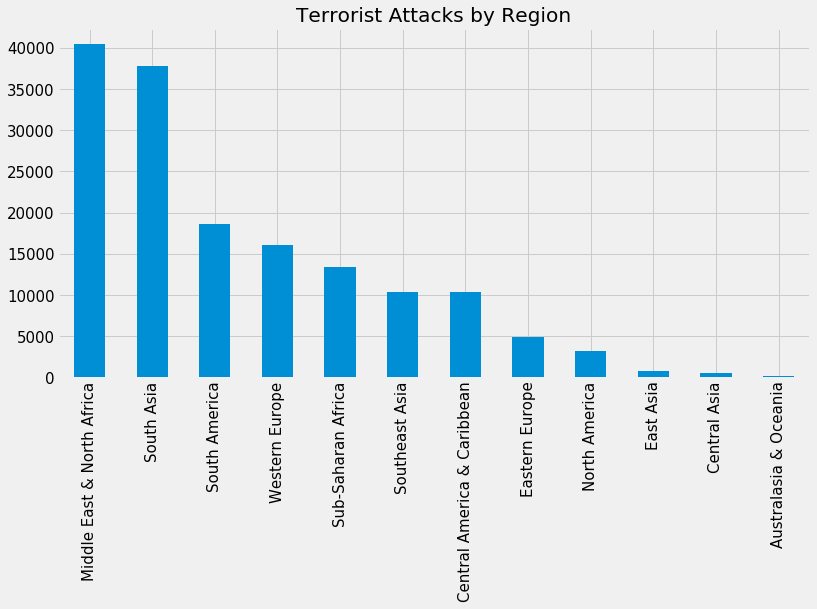

In [13]:
# Regions plot:
gtd['region_txt'].value_counts().plot("bar",figsize=(12,6), fontsize=15,title="Terrorist Attacks by Region")

In [14]:
# Terror attacks by country:
gtd.country_txt.value_counts()

Iraq                              18770
Pakistan                          12768
India                              9940
Afghanistan                        9690
Colombia                           8077
Peru                               6085
Philippines                        5576
El Salvador                        5320
United Kingdom                     4992
Turkey                             3557
Thailand                           3338
Spain                              3239
Sri Lanka                          2982
Somalia                            2890
Nigeria                            2888
Algeria                            2720
United States                      2693
France                             2617
Yemen                              2598
Lebanon                            2413
Chile                              2334
Russia                             2104
Israel                             2085
Guatemala                          2050
West Bank and Gaza Strip           1990


 Iraq "leads" by far over the other countries in terror attacks, followd by Pakistan, India, Afghanistan, Columbia and Peru. The five least terror prone countries are St. Lucia, Gibraltar, Brunei, Falkland Islands and Wallis and Futuna. 

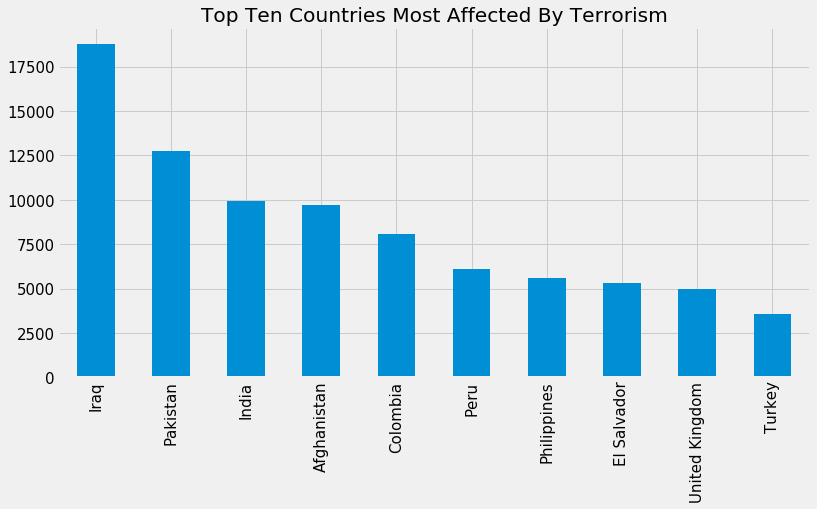

In [15]:
# Let's plot this
gtd['country_txt'].value_counts()[0:10].plot("bar",figsize=(12,6), fontsize=15,title="Top Ten Countries Most Affected By Terrorism")

In [16]:
gtd.attacktype1_txt.value_counts()

Bombing/Explosion                      75963
Armed Assault                          37554
Assassination                          17582
Hostage Taking (Kidnapping)             9115
Facility/Infrastructure Attack          8849
Unknown                                 5490
Hostage Taking (Barricade Incident)      835
Unarmed Assault                          828
Hijacking                                556
Name: attacktype1_txt, dtype: int64

A bombing/explosion type of attack is by far the most "popular"! 

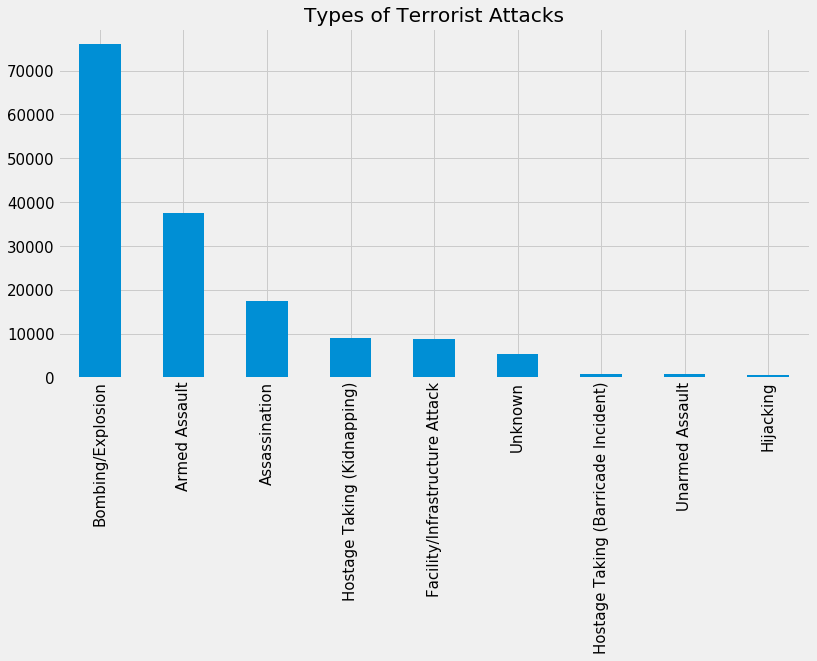

In [17]:
# Plot:
gtd['attacktype1_txt'].value_counts().plot("bar",figsize=(12,6), fontsize=15,title="Types of Terrorist Attacks")

In [18]:
# Let's take a look at terrorist groups:
gtd.gname.value_counts()

Unknown                                               71922
Taliban                                                5502
Shining Path (SL)                                      4548
Farabundo Marti National Liberation Front (FMLN)       3351
Islamic State of Iraq and the Levant (ISIL)            2833
Irish Republican Army (IRA)                            2670
Revolutionary Armed Forces of Colombia (FARC)          2474
New People's Army (NPA)                                2241
Al-Shabaab                                             2127
Basque Fatherland and Freedom (ETA)                    2024
Boko Haram                                             1839
Kurdistan Workers' Party (PKK)                         1782
Communist Party of India - Maoist (CPI-Maoist)         1666
Liberation Tigers of Tamil Eelam (LTTE)                1606
National Liberation Army of Colombia (ELN)             1418
Tehrik-i-Taliban Pakistan (TTP)                        1153
Maoists                                 

In [19]:
# "Top Ten" Terror groups:
groups = gtd[gtd["gname"]!="Unknown"].groupby('gname').size().sort_values(ascending=False).head(10).to_frame(name = 'count').reset_index()
groups

,gname,count
0,Taliban,5502
1,Shining Path (SL),4548
2,Farabundo Marti National Liberation Front (FMLN),3351
3,Islamic State of Iraq and the Levant (ISIL),2833
4,Irish Republican Army (IRA),2670
5,Revolutionary Armed Forces of Colombia (FARC),2474
6,New People's Army (NPA),2241
7,Al-Shabaab,2127
8,Basque Fatherland and Freedom (ETA),2024
9,Boko Haram,1839


In [20]:
gtd.groupby('iyear').size()

iyear
1970      651
1971      470
1972      494
1973      473
1974      580
1975      740
1976      923
1977     1319
1978     1526
1979     2661
1980     2663
1981     2585
1982     2545
1983     2870
1984     3494
1985     2915
1986     2860
1987     3184
1988     3721
1989     4322
1990     3887
1991     4683
1992     5073
1994     3458
1995     3081
1996     3056
1997     3200
1998      933
1999     1396
2000     1813
2001     1908
2002     1332
2003     1262
2004     1161
2005     2011
2006     2751
2007     3241
2008     4787
2009     4721
2010     4821
2011     5067
2012     8498
2013    11990
2014    16840
2015    14806
dtype: int64

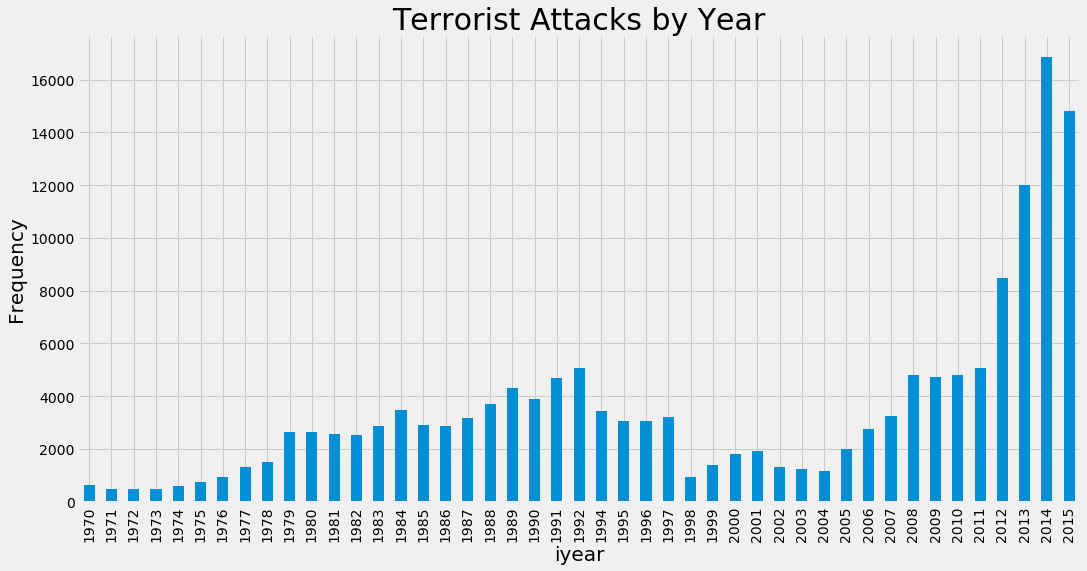

In [21]:
plt.figure(figsize=(16,8))
year = gtd.groupby('iyear').size()
plt.ylabel("Frequency", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.title("Terrorist Attacks by Year", fontsize=30)
year.plot("bar")

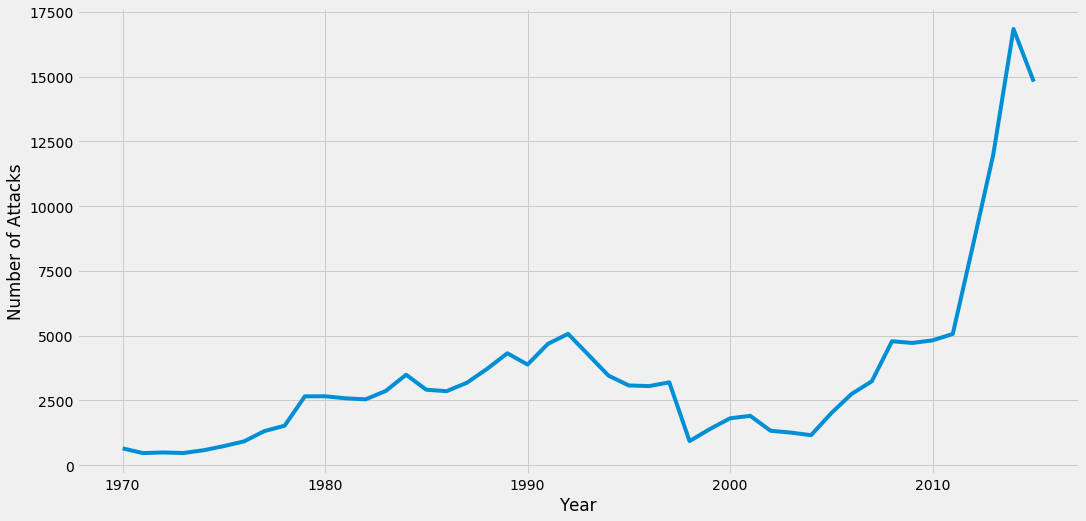

In [22]:
plt.figure(figsize=(16,8))
year_attacks = gtd.iyear.value_counts().sort_index()
plt.plot(year_attacks.index, year_attacks)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

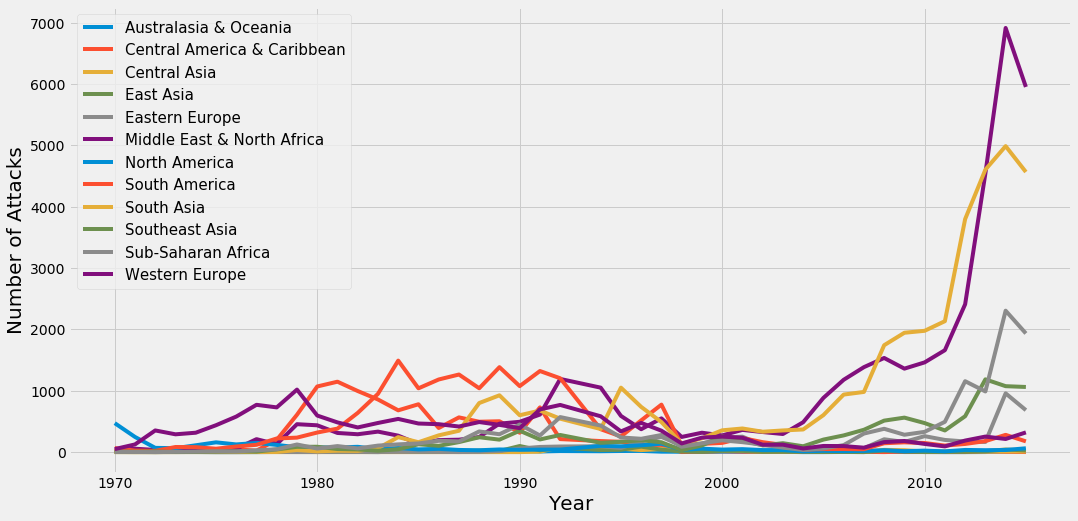

In [23]:
# Number of attacks by year and region
plt.figure(figsize=(16,8))
regions_year_crosstab = pd.crosstab(gtd.iyear, gtd.region_txt)
for region in regions_year_crosstab.columns:
    plt.plot(regions_year_crosstab.index, regions_year_crosstab[region])
    
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Attacks', fontsize=20)
plt.legend(fontsize=15)

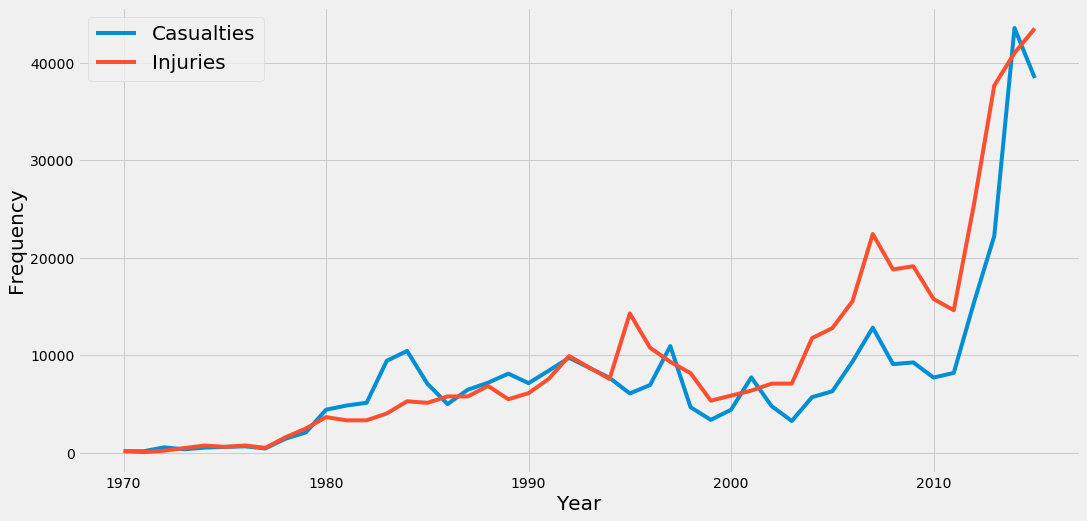

In [24]:
# Let's look at casualties and injuries by year:
plt.figure(figsize=(16,8))
kills_by_year = gtd.groupby('iyear').nkill.sum()
wounded_by_year = gtd.groupby('iyear').nwound.sum()
plt.plot(kills_by_year.index, kills_by_year)
plt.plot(wounded_by_year.index, wounded_by_year)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.legend(['Casualties', 'Injuries'], fontsize=20)

# Part Two: Bayesian Inference

I want to compare Israel to Palestine (West Bank and Gaza Strip) in the total ammounts of attacks that occured in both places.

In [25]:
# I want to look at Israel separately 
israel = gtd[gtd.country_txt == 'Israel']

In [26]:
israel.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
505,197009060004,1970,9,6,NaN,0,NaN,97,Israel,10,...,NaN,NaN,NaN,NaN,Hijacking DB,0,0,0,0,NaN
1014,197109160001,1971,9,16,NaN,0,NaN,97,Israel,10,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
1311,197205300001,1972,5,30,NaN,0,NaN,97,Israel,10,...,NaN,NaN,NaN,NaN,PGIS,1,1,0,1,NaN
2047,197312040002,1973,12,4,NaN,0,NaN,97,Israel,10,...,NaN,NaN,NaN,NaN,PGIS,1,0,0,1,NaN
2158,197402110001,1974,2,11,NaN,0,NaN,97,Israel,10,...,NaN,NaN,NaN,NaN,PGIS,1,0,1,1,NaN


In [27]:
israel.shape

(2085, 137)

In [28]:
# Palestinian Authority 
palestine = gtd[gtd.country_txt == 'West Bank and Gaza Strip']

In [29]:
palestine.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
1139,197201160001,1972,1,16,NaN,0,NaN,155,West Bank and Gaza Strip,10,...,NaN,NaN,NaN,NaN,State Department 1997 Document,-9,-9,1,1,NaN
3684,197604290004,1976,4,29,NaN,0,NaN,155,West Bank and Gaza Strip,10,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
6157,197804200004,1978,4,20,NaN,0,NaN,155,West Bank and Gaza Strip,10,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
6588,197808290001,1978,8,29,NaN,0,NaN,155,West Bank and Gaza Strip,10,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
6651,197809120002,1978,9,12,NaN,0,NaN,155,West Bank and Gaza Strip,10,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN


In [30]:
palestine.shape

(1990, 137)

So Israel and Palestine are not that different in number of events - 2085 compared to 1990, respectively (from 1970 until 2015).

Because both Israel and Palestine belong to the Middle Ease and North Africa region, I will use the region average and standard deviation as priors. 

In [31]:
MENA = gtd[gtd.region_txt == 'Middle East & North Africa']

In [32]:
prior_mean = MENA.attacktype1_txt.value_counts().mean()
prior_mean

4491.333333333333

In [33]:
prior_std = MENA.attacktype1_txt.value_counts().std()
prior_std

7772.753164098292

In [34]:
with pm.Model() as model:
    israel_mean = pm.Normal('Israel_mean', prior_mean, sd=prior_std)
    palestine_mean = pm.Normal('Palestine_mean', prior_mean, sd=prior_std)


In [35]:
std_prior_lower = 0.01
std_prior_upper = 100.0

with model:
    israel_std = pm.Uniform('Israel_std', lower=std_prior_lower, upper=std_prior_upper)
    palestine_std = pm.Uniform('Palestine_std', lower=std_prior_lower, upper=std_prior_upper)


In [36]:
with model:
    israel_model = pm.Normal('Attack_Israel', mu=israel_mean, sd=israel_std, observed=MENA.attacktype1_txt.value_counts())
    palestine_model = pm.Normal('Attacks_Palestine', mu=palestine_mean, sd=palestine_std, observed=MENA.attacktype1_txt.value_counts())
        

In [37]:
with model:
    diff_of_means = pm.Deterministic('difference of means', israel_mean - palestine_mean)
    diff_of_stds = pm.Deterministic('difference of stds',israel_std - palestine_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt(israel_std**2 + palestine_std**2 / 2))

In [38]:
with model:
    trace = pm.sample(25000, njobs=4)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -48,465: 100%|██████████| 200000/200000 [00:17<00:00, 11542.28it/s]
Finished [100%]: Average ELBO = -48,465
100%|██████████| 25000/25000 [01:50<00:00, 225.47it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x120fdc810>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12acc3110>], dtype=object)

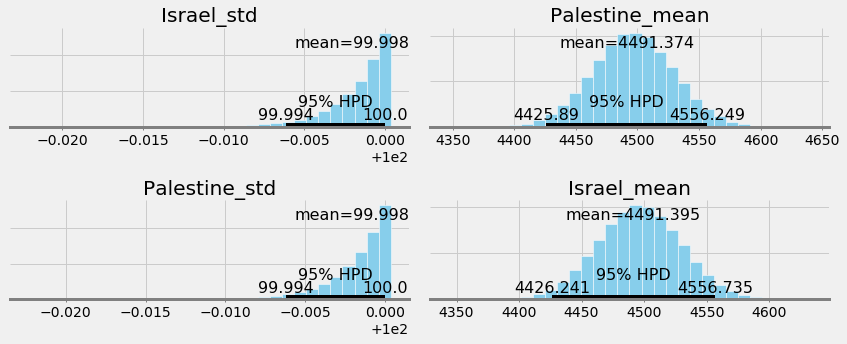

In [39]:
pm.plot_posterior(trace[3000:],
                  varnames=['Israel_mean', 'Palestine_mean', 'Israel_std', 'Palestine_std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x123696a50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12024e190>], dtype=object)

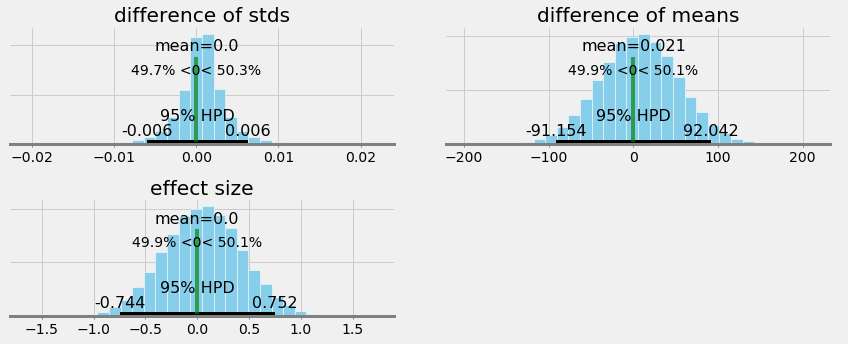

In [40]:
pm.plot_posterior(trace[3000:],
                  varnames=['difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

In [41]:
pm.summary(trace[3000:],
           varnames=['difference of means', 'difference of stds', 'effect size'])


difference of means:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.021            46.761           0.178            [-91.154, 92.042]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -91.414        -31.392        0.132          31.452         91.842


difference of stds:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.000            0.003            0.000            [-0.006, 0.006]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.006         -0.001         0.000          0.001          0.006


effect size:

  Mean             SD               MC Error         95% HP

# Part Three - Estimationg Bombing Attacks in 1993

I am trying to predict bombing/explosion attacks in 1993. 

In [43]:
bombing_attacks = gtd[gtd.attacktype1_txt == "Bombing/Explosion"]

In [51]:
gtd_92 = gtd[gtd.iyear == 1992]

In [53]:
gtd_92.groupby('attacktype1').size()

attacktype1
1    1111
2    1327
3    1738
4      24
5      22
6     142
7     473
8      48
9     188
dtype: int64

In [59]:
gtd_94 = gtd[gtd.iyear == 1994]

In [60]:
gtd_94.groupby('attacktype1').size()

attacktype1
1     771
2     818
3    1153
4      37
5      34
6     191
7     189
8      61
9     204
dtype: int64

Bombing attacks in 1992 - 1,738, bombing attacks in 1994 - 1,153.
If I take the average of 1992 and 1994, it could be an estimate for 1993 - 1,445 bombing attacks.